# *In Vivo* Automated Immune Cell Segmentation Notebook
### Author: Peter Rehani

- - - 
## Imports and Function Definitions 
Here, we define exactly which external packages we need to import for use in the code. Additionally, we import the custom functions that are used later in the code.

A few reminders..
- Every cell in this block only needs to be run one time upon initially starting the Jupyter Kernel
- Function definitions like these help reduce the amount of copied code and is super useful for commonly needed functionality
- If you are ever curious about what a specific function does, simply type `help(function_name)` (ex. `help(current_method)` will provide the docstring (in-line code documentation) for that particular method.

**Important note!**
- If this is the first time running the notebook, please run the below cell to ensure all packages are properly updated and installed

In [ ]:
!pip install -r requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from pathlib import Path
from ipywidgets import Box
import ipywidgets as widgets

from core.tools.file_readin import *
from core.segmentation_algorithms.adaptive_segmentation import *
print('Imported everything successfully!')

Imported everything successfully!


- - -
## File Input and Read-In
In this section, the file read in is performed: 
- This involves reading in all relevant channels, composite images, and ground truth masks
- All file IO only needs to be completed one time; if for any reason the data is messed up or corrupted, you can simply use the reference dataset 

In [2]:
base_path = Path(r'Z:\\Alexa H\\Morgridge Institute for Research\\Skala Group\\2P Data\\Alexa Data\\In Vivo\\20210709\\CD4_Mouse_618015\\Paper')
channel_keys = ['mCherry_photons',
                'NADH',
                'FAD',
                'mCherry_a1',
                'mCherry_t1',
                'Composite']
channel_regex_values = [r'*Ch1-_photons.asc',
                        r'*Ch3-_photons.asc',
                        r'*Ch2-_photons.asc',
                        r'*Ch1-_a1[%].asc',
                        r'*Ch1-_t1.asc',
                        r'*Composite.tif']
print('Established path and channel parameters!')

Established path and channel parameters!


In [5]:
mCherry_photons_image_paths = list(base_path.rglob(r'*Ch1-_photons.asc'))
mCherry_photons_gt_paths = list(base_path.rglob(r'*-_photons_cells.tif*'))
mCherry_t1_image_paths = list(base_path.rglob(r'*Ch1-_t1.asc*'))
composite_image_paths = list(base_path.rglob(r'*Composite.tif'))

In [6]:
accumulator_dict = file_readin(mCherry_photons_gt_paths, mCherry_photons_image_paths, mCherry_t1_image_paths, composite_image_paths)

Read in: Z:\Alexa H\Morgridge Institute for Research\Skala Group\2P Data\Alexa Data\In Vivo\20210709\CD4_Mouse_618015\Paper\ExVivo_Spleen\CD4_618015S_FOV4-008\CD4_618015S_FOV4-Ch1-_photons_cells.tiff
Read in: Z:\Alexa H\Morgridge Institute for Research\Skala Group\2P Data\Alexa Data\In Vivo\20210709\CD4_Mouse_618015\Paper\ExVivo_Spleen\CD4_618015S_FOV4-008\CD4_618015S_FOV4-Ch1-_t1.asc
Read in: Z:\Alexa H\Morgridge Institute for Research\Skala Group\2P Data\Alexa Data\In Vivo\20210709\CD4_Mouse_618015\Paper\ExVivo_Spleen\CD4_618015S_FOV4-008\CD4_618015S_FOV4_Composite.tif
Read in: Z:\Alexa H\Morgridge Institute for Research\Skala Group\2P Data\Alexa Data\In Vivo\20210709\CD4_Mouse_618015\Paper\ExVivo_Spleen\CD4_618015S_FOV5-010\CD4_618015S_FOV5-Ch1-_photons_cells.tiff
Read in: Z:\Alexa H\Morgridge Institute for Research\Skala Group\2P Data\Alexa Data\In Vivo\20210709\CD4_Mouse_618015\Paper\ExVivo_Spleen\CD4_618015S_FOV5-010\CD4_618015S_FOV5-Ch1-_t1.asc
Read in: Z:\Alexa H\Morgridge Inst

- - -
## Adaptive Segmentation
In this section, the segmentation is performed: 


In [7]:
for (ix, fname) in enumerate(accumulator_dict.keys()):
    if ix == 0:
        start = "{"
    else: 
        start = " "
    if ix == len(accumulator_dict.keys())-1: 
        end = "}"
    else: 
        end = ","
    print(f'{start}{ix} : {fname}{end}')

{0 : CD4_618015S_FOV4-008,
 1 : CD4_618015S_FOV5-010,
 2 : CD4_618015S_FOV6-012,
 3 : CD4_618015_FOV1-002,
 4 : CD4_618015_FOV2-006,
 5 : CD4_618015_FOV3-011,
 6 : CD4_618015_FOV4-013,
 7 : CD4_618015_FOV5-018,
 8 : CD4_618015_FOV6-021,
 9 : CD4_618015_FOV7-025,
 10 : CD4_618015_FOV8-027}


1 CD4_618015_FOV1-002


C:\Users\Peter\AppData\Local\Temp/ipykernel_8340/1257722776.py:1: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  data_list, best_method_list = adaptive_segmentation(list(accumulator_dict.values()),


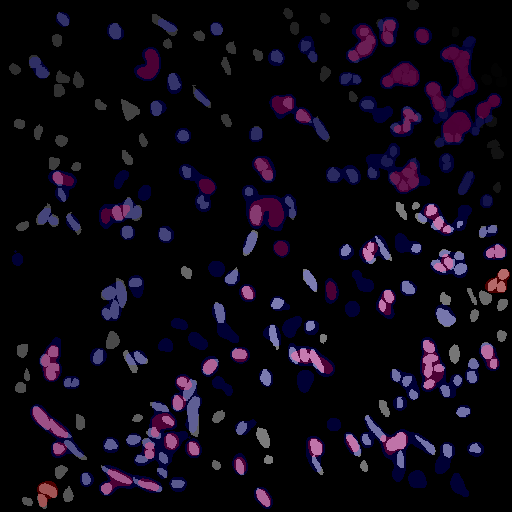

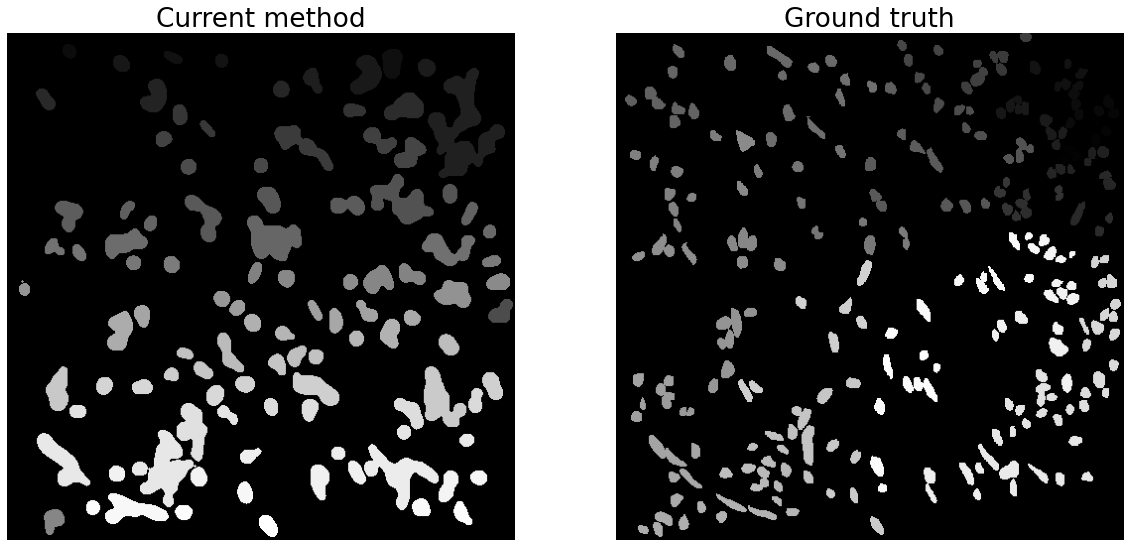

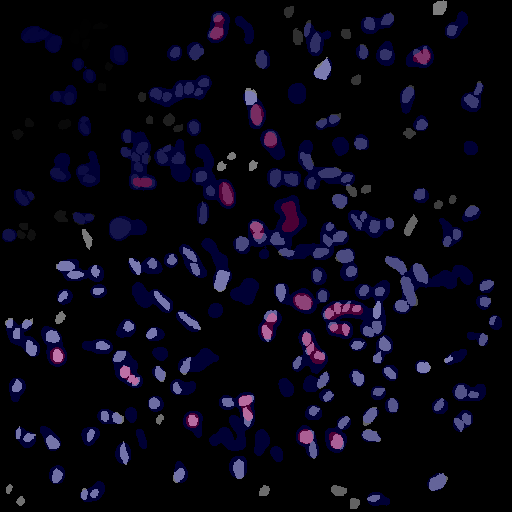

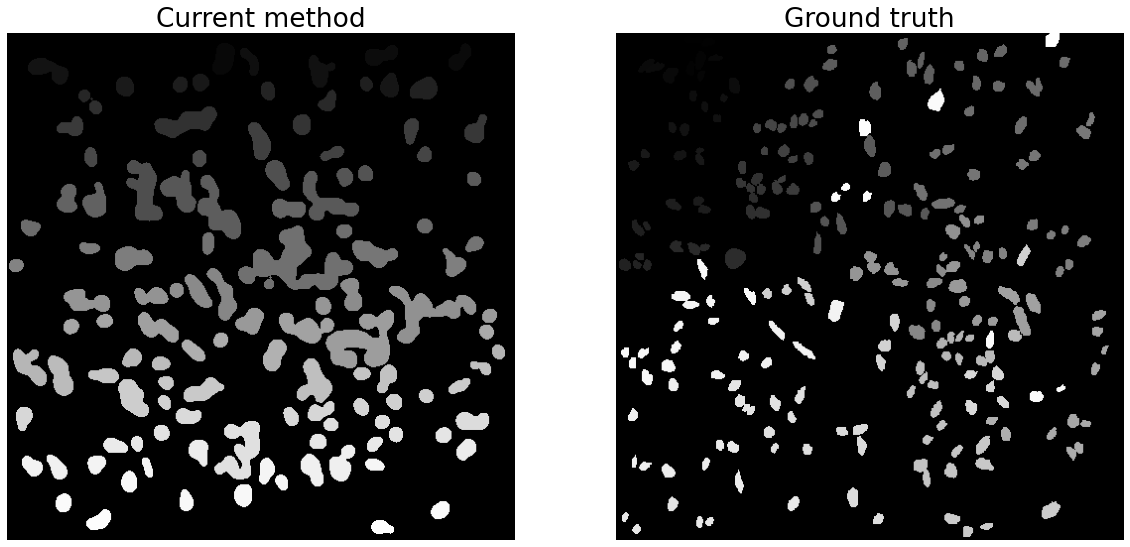

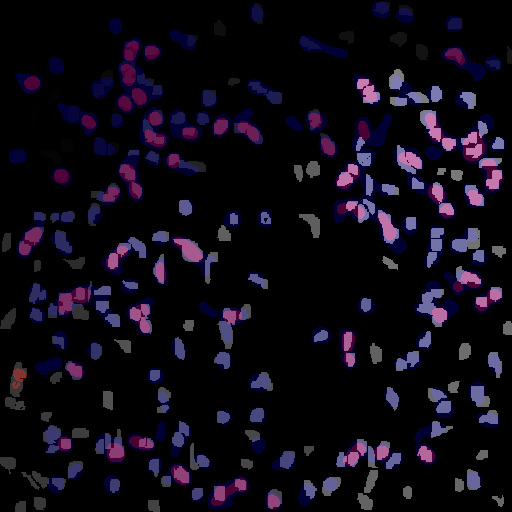

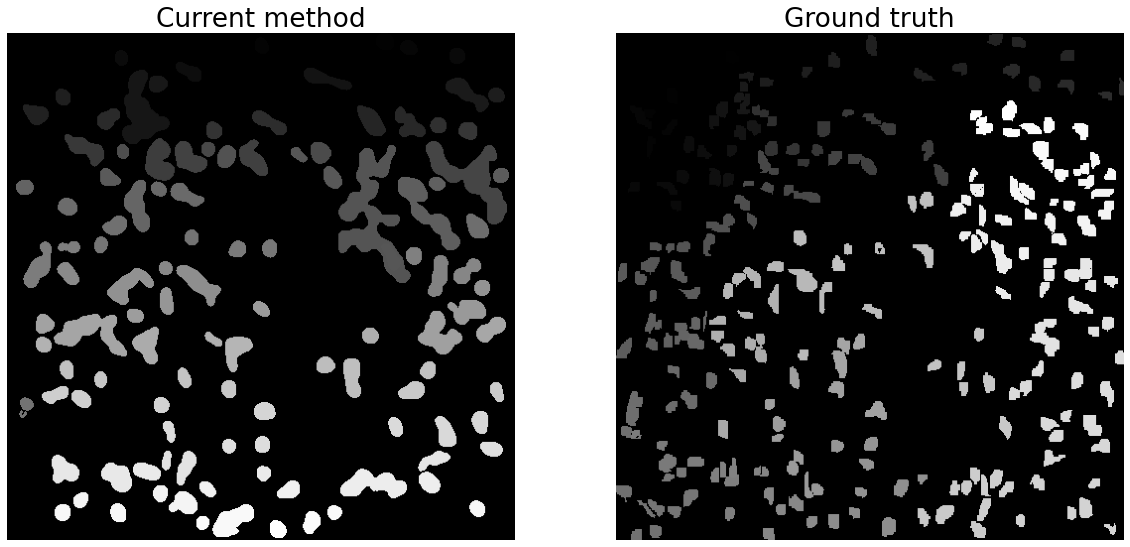

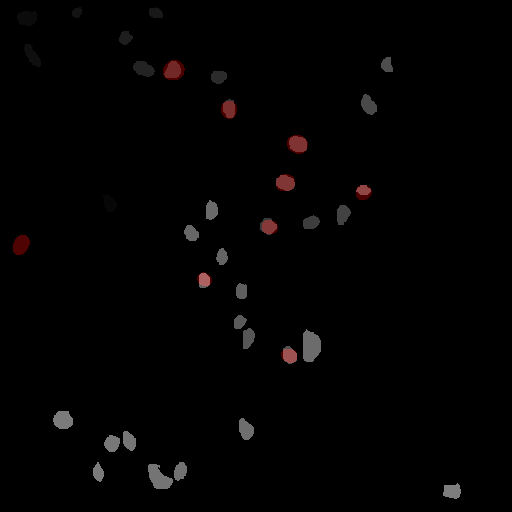

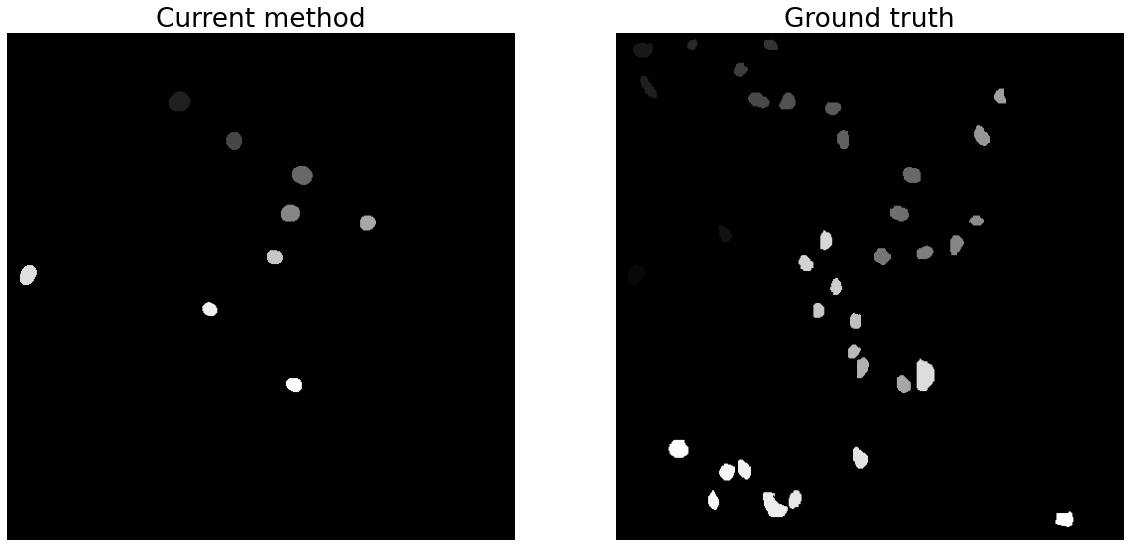

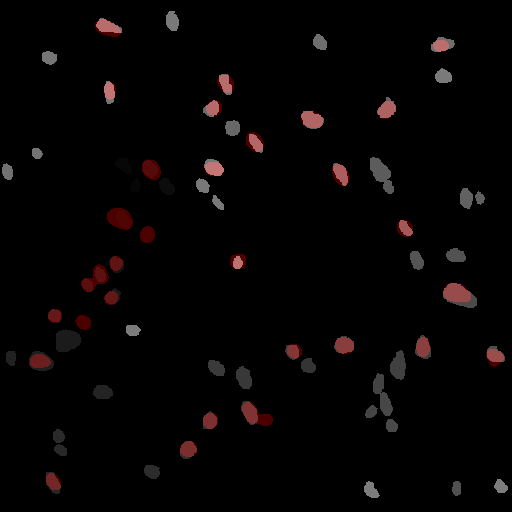

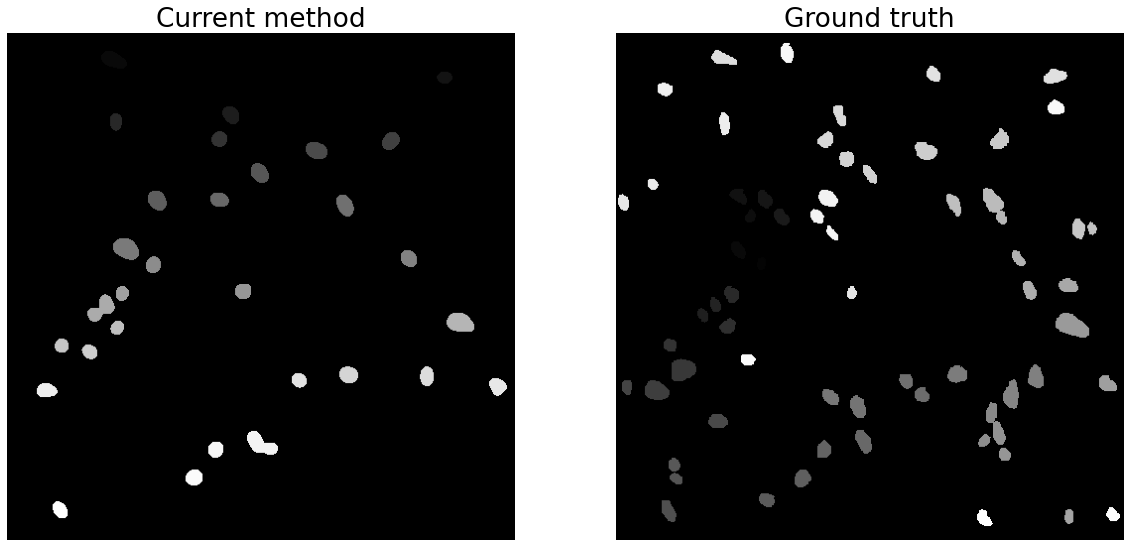

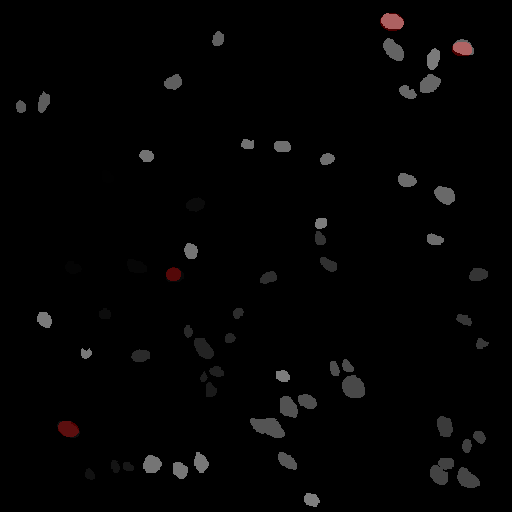

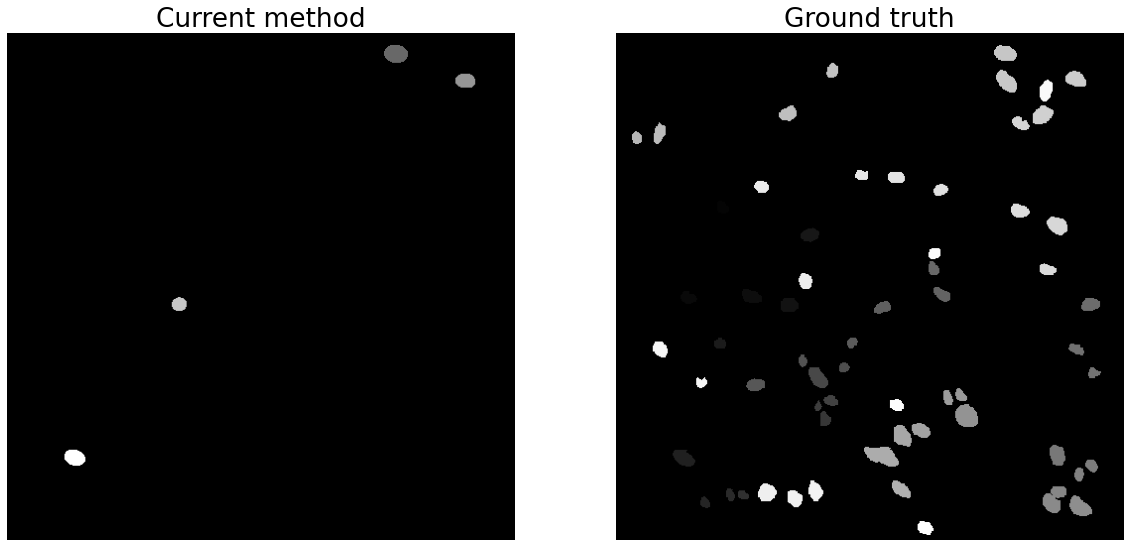

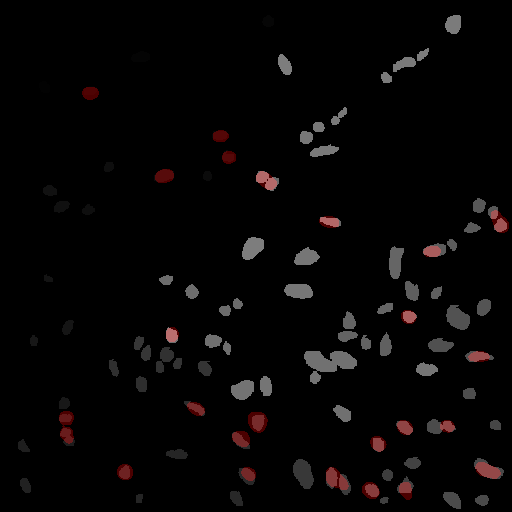

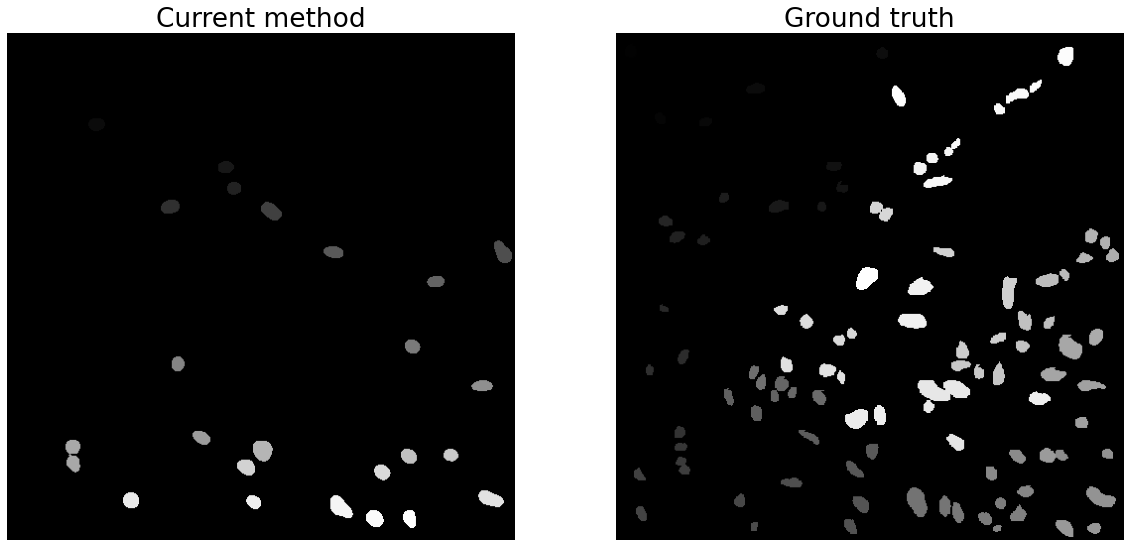

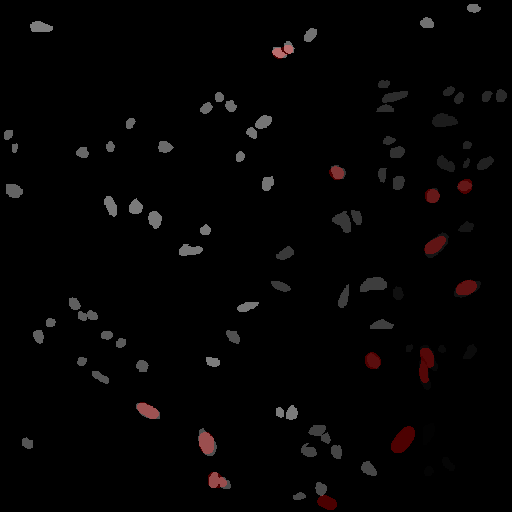

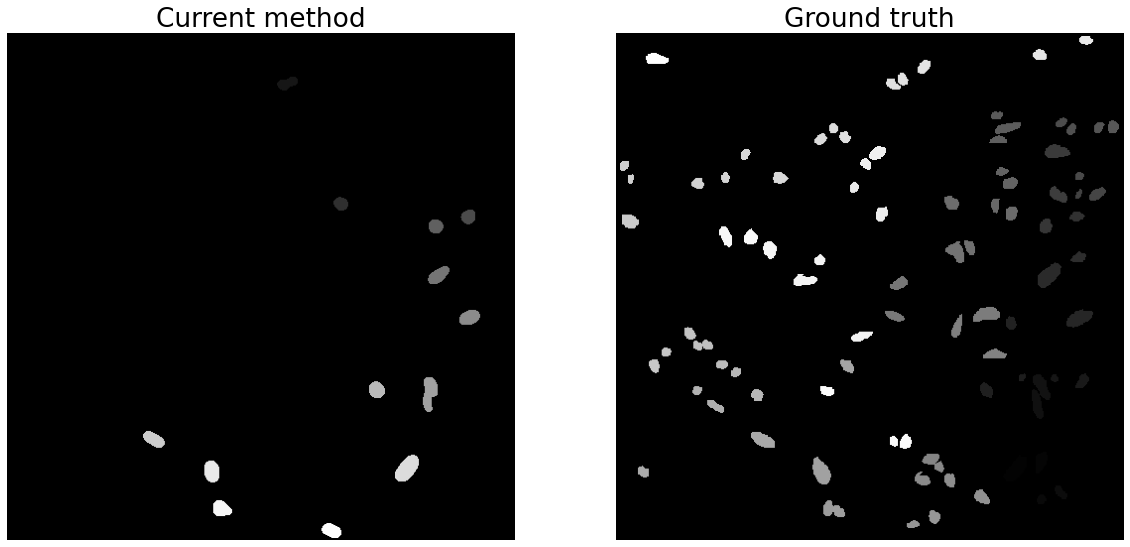

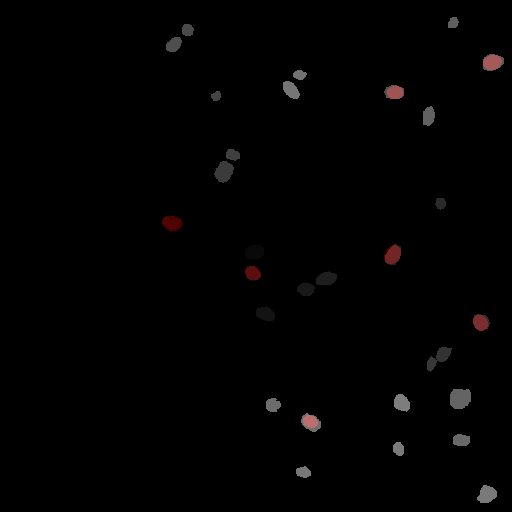

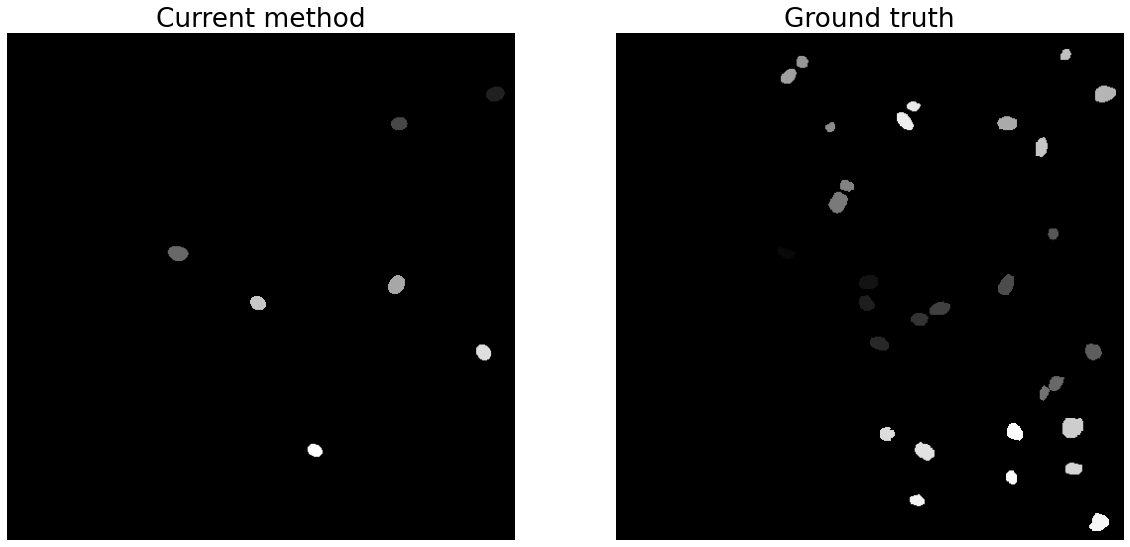

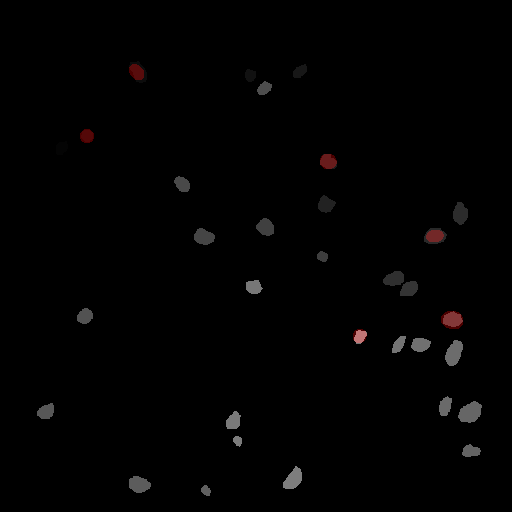

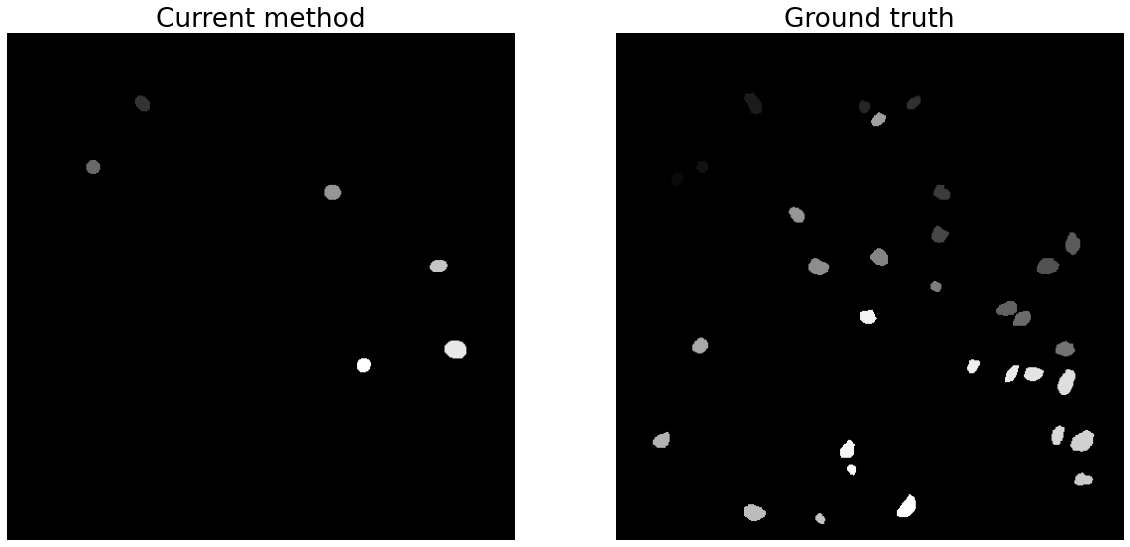

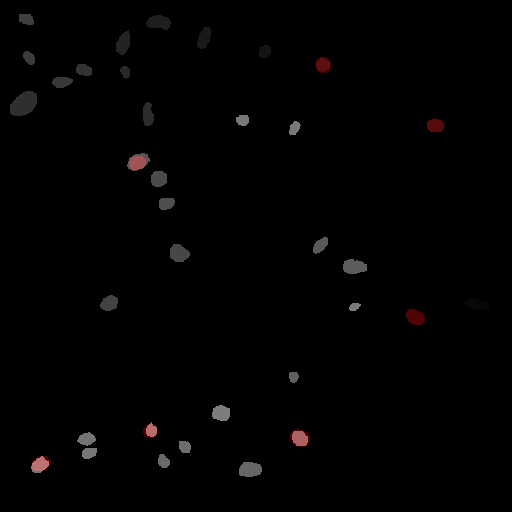

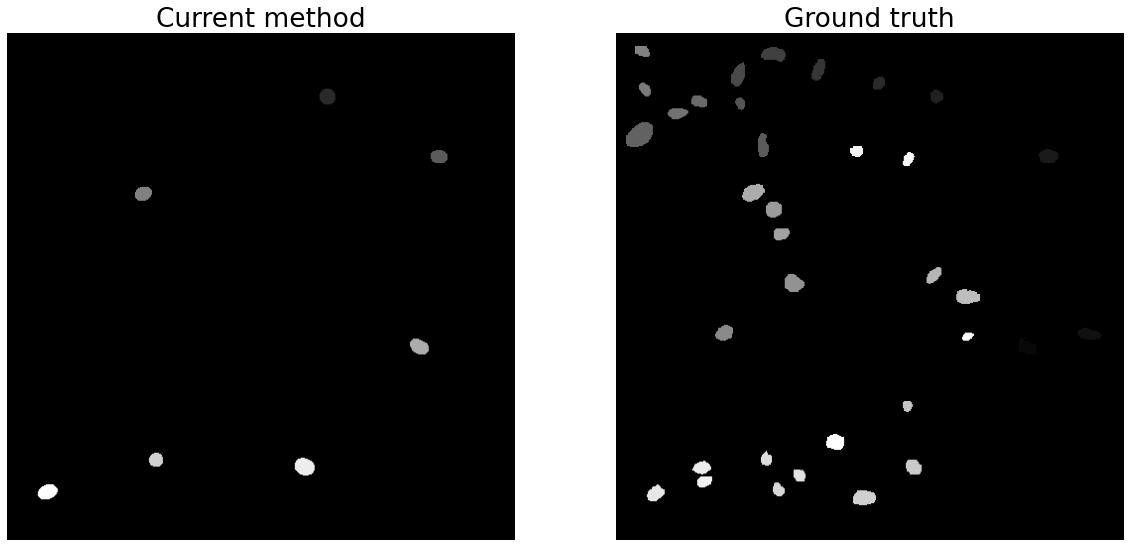

                 file_name                                              combo  \
0     CD4_618015S_FOV4-008                                             (min,)   
1     CD4_618015S_FOV4-008                                             (yen,)   
2     CD4_618015S_FOV4-008                                            (otsu,)   
3     CD4_618015S_FOV4-008                                      (local_otsu,)   
4     CD4_618015S_FOV4-008                                           (local,)   
...                    ...                                                ...   
1392   CD4_618015_FOV8-027      (min, yen, otsu, local, triangle, multi_otsu)   
1393   CD4_618015_FOV8-027  (min, yen, local_otsu, local, triangle, multi_...   
1394   CD4_618015_FOV8-027  (min, otsu, local_otsu, local, triangle, multi...   
1395   CD4_618015_FOV8-027  (yen, otsu, local_otsu, local, triangle, multi...   
1396   CD4_618015_FOV8-027  (min, yen, otsu, local_otsu, local, triangle, ...   

          Dice  
0     0.00

In [11]:
data_list, best_method_list = adaptive_segmentation(list(accumulator_dict.values()),
                                                        save_masks=True, 
                                                        metric_list=['Dice'],
                                                        min_roi_size=150,
                                                        cellpose_data=None, 
                                                        local_otsu_radius=25,
                                                        multi_otsu_classes=2,
                                                        include_lifetime=True, 
                                                        include_cellpose=False, 
                                                        threshold_methods='all',
                                                        pre_threshld_image=True,
                                                        export_metrics_csv=True,
                                                        lifetime_start_value=0,
                                                        lifetime_end_value=1500,
                                                        save_comparison_images=False, 
                                                        optimize_pre_threshold=False,
                                                        display_comparison_images=True,
                                                        export_intermediate_images=True,
                                                        export_intermediate_indices={1 : 'CD4_618015_FOV1-002'},
                                                        local_threshold_block_size_start=2,
                                                        local_threshold_block_size_end=102,
                                                        local_threshold_block_size_list=[19]*len(accumulator_dict.values()),
                                                        local_threshold_block_methods='all')